<p align="center">
  <img width="300" height="290" src="https://i.imgur.com/mu6ZuGT.jpg">
</p>

<h1><b>TC4033</b></h1>
<h1><b>Visión computacional para imágenes y video</b></h1>
<h3><b>9.2 Segmentación de imágenes</b></h3>
<h3><b>9.4 Algoritmo de segmentación de Otsu,</b></h3>
<h3><b>Docentes:</b> Dr. Gilberto Ochoa Ruiz, Mtra. María Guadalupe Marcos Abularach</h3>

<h2><b>Equipo 30:</b></h2>

- Julio Baltazar Colín: A01794476
- Helmy Andrea Moreno Navarro: A01793918
- Maricel Parra Osorio - A01793932
- Yeison Fernando Villamil Franco: A01793803


# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np

In [ ]:
import cv2 as cv2

In [ ]:
# Convertir una imagen en color a escala de grises
from io import BytesIO
import requests

def imagen_desde_url(url):
  # Obtener la imagen desde la URL
  response = requests.get(url)
  img_data = BytesIO(response.content)

  # Decodificar los datos de la imagen y convertir a matriz de imagen
  image = cv2.imdecode(np.frombuffer(img_data.read(), np.uint8), 1)

  # Convertir la imagen de BGR a RGB (ya que OpenCV carga imágenes en formato BGR por defecto)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  return image

In [ ]:
# Función para mostrar múltiples imágenes en una cuadrícula
def display_images(image_dict, nrow, ncol, xsz=15, ysz=7,):
    """
    Muestra imágenes en un diccionario en una cuadrícula de subplots.

    Parámetros:
    - image_dict: Diccionario de imágenes donde las claves son los títulos de las imágenes y los valores son las propias imágenes.
    - nrow: Número de filas en la cuadrícula de subplots.
    - ncol: Número de columnas en la cuadrícula de subplots.
    - xsz: Tamaño del plot en el eje x.
    - ysz: Tamaño del plot en el eje y.
    - hspace: Espacio vertical entre los subplots.
    """
    # Crear una figura y un conjunto de subplots
    fig, axes = plt.subplots(nrow, ncol, figsize=(xsz, ysz))

    # Ajustar el espaciado entre subplots
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.6, wspace=0.1, hspace=0.1)

    # Iterar sobre el diccionario de imágenes y mostrar en subplots
    for (title, image), ax in zip(image_dict.items(), axes.ravel()):
        ax.imshow(image, cmap='gray')  # Mostrar la imagen en escala de grises
        ax.set_title(title)  # Establecer el título del subplot
        ax.set_xticks([])  # Remover las escalas numéricas del eje x
        ax.set_yticks([])  # Remover las escalas numéricas del eje y

    # Ocultar subplots restantes si hay menos imágenes que subplots
    for ax in axes.ravel()[len(image_dict):]:
        ax.axis('off')

    plt.show()

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

<ipython-input-2-ce81723eaa7b>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


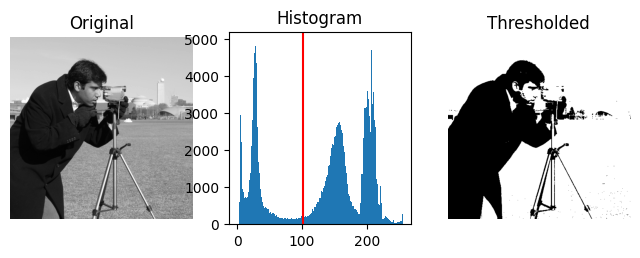

In [2]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




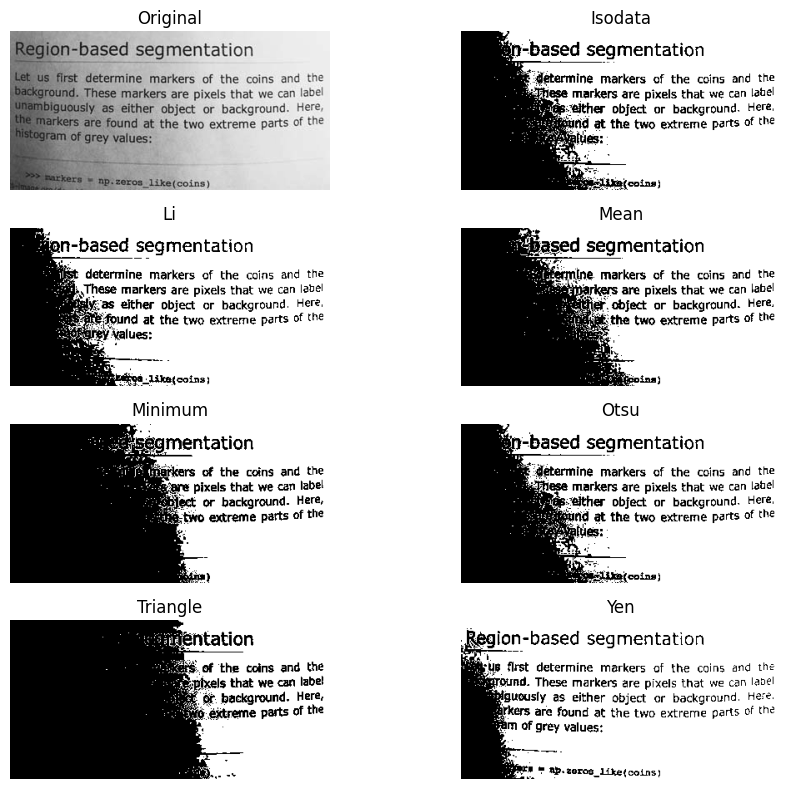

In [3]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [4]:
# TODO: Slide image for segmentation, alpha blerding

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

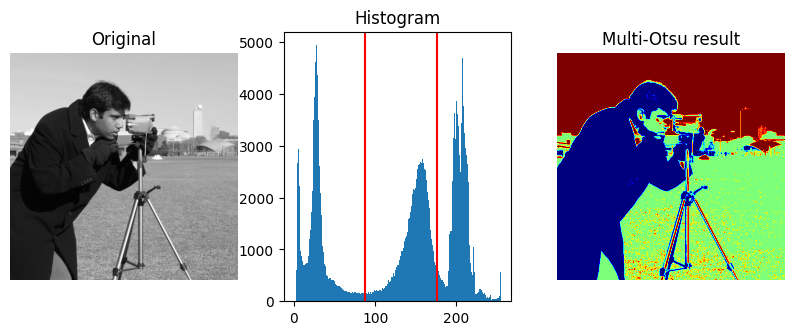

In [5]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()